##### ARTI 560 - Computer Vision  
## Image Classification using Convolutional Neural Networks (CNNs) - Exercise 

### Objective

In this exercise, you will:

1. **Load the Fashion MNIST dataset** from the [Keras dataset](https://keras.io/api/datasets/) website.
2. **Preprocess the data** for training.
3. **Build your own CNN architecture** and evaluate the model.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from collections import Counter

# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Number of unique classes
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Number of classes: 10


In [2]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

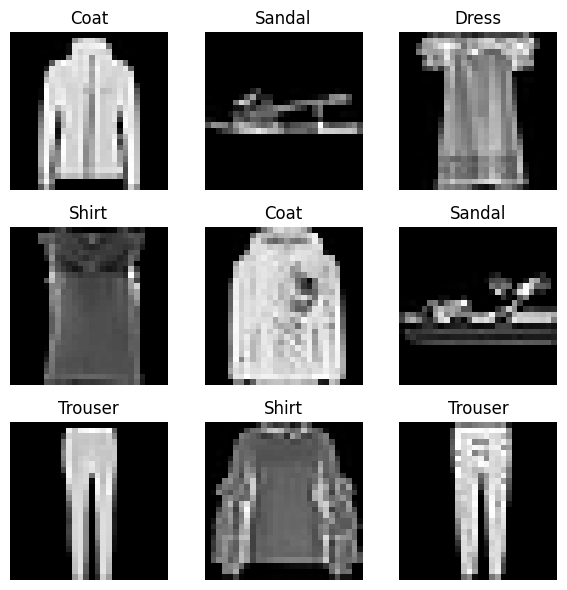

In [3]:
# Plot a 3x3 grid of random images from the dataset with their labels
plt.figure(figsize=(6,6))
for i in range(9):
    idx = np.random.randint(0, len(x_train))
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[idx], cmap="gray")
    plt.title(class_names[y_train[idx]])
    plt.axis("off")
plt.tight_layout()
plt.show()

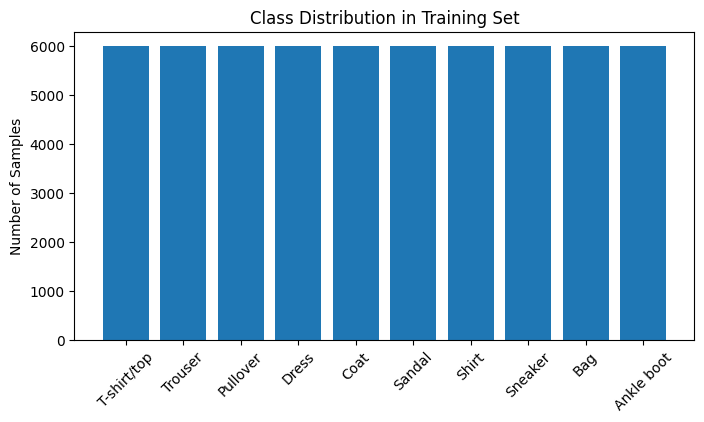

In [4]:
# Count occurrences of each class in the training set
class_counts = Counter(y_train)

# Plot the class distribution
plt.figure(figsize=(8,4))
plt.bar(class_names, [class_counts[i] for i in range(num_classes)])
plt.xticks(rotation=45)
plt.title("Class Distribution in Training Set")
plt.ylabel("Number of Samples")
plt.show()

### Build your Image Classification Model
Note: Don't use one hot encoding and use sparse_categorical_crossentropy for loss

In [6]:

# Import libraries

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import layers

# Load Fashion MNIST data

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


# Normalize pixel values

x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Add channel dimension (CNN requirement)
x_train = x_train[..., np.newaxis]
x_test  = x_test[..., np.newaxis]

# Data Augmentation

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Build Improved CNN Model

model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    
    data_augmentation,

    layers.Conv2D(32, 3, padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])


# Compile

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


# Callbacks

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=5,
        restore_best_weights=True
    )
]

# Train

model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks
)


# Evaluate

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)


Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 148s 179ms/step - accuracy: 0.7132 - loss: 0.7868 - val_accuracy: 0.7410 - val_loss: 0.6698
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 172s 229ms/step - accuracy: 0.7907 - loss: 0.5692 - val_accuracy: 0.8177 - val_loss: 0.4812
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 157s 209ms/step - accuracy: 0.8178 - loss: 0.4987 - val_accuracy: 0.8144 - val_loss: 0.4828
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 156s 208ms/step - accuracy: 0.8313 - loss: 0.4599 - val_accuracy: 0.8492 - val_loss: 0.3944
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 152s 203ms/step - accuracy: 0.8416 - loss: 0.4317 - val_accuracy: 0.8720 - val_loss: 0.3457
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 159s 211ms/step - accuracy: 0.8509 - loss: 0.4098 - val_accuracy: 0.8393 - val_loss: 0.4101
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 139s 185ms/step - accuracy: 0.8584 - loss: 0.3909 - val_accuracy: 0.8635 - val_loss: 0.3779
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 150s 199ms/step - accuracy: 0.8628 -